In [1]:
import pydicom
import matplotlib.pyplot as plt
from pydicom import DataElement


In [11]:

# Đường dẫn đến file DICOM
dicom_file_path = "/home/xenwithu/Documents/VNPTIT/VinChestXR/received_images/1.2.276.0.7230010.3.1.4.1889283818.3972.1736132654.334.dcm"

# Đọc file DICOM
dicom_data = pydicom.dcmread(dicom_file_path)


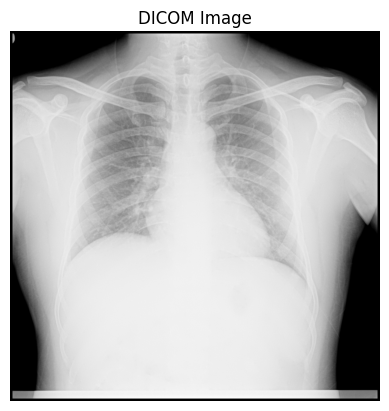

In [12]:

# Kiểm tra xem file DICOM có chứa Pixel Data không
if hasattr(dicom_data, "PixelData"):
    # Lấy dữ liệu ảnh từ DICOM
    pixel_array = dicom_data.pixel_array


    plt.imshow(pixel_array, cmap="gray")
    plt.title("DICOM Image")
    plt.axis("off")  # Ẩn trục
    plt.show()
else:
    print("This DICOM file does not contain Pixel Data.")


In [31]:
import pydicom
from pydicom.tag import Tag
from pydicom.uid import generate_uid
from pydicom import DataElement
import time

In [32]:

dicom_file_path = "/home/xenwithu/Documents/VNPTIT/PythonProject/src/dicom_files/vinxr/00150343289f317a0ad5629d5b7d9ef9.dicom"

# Đọc file DICOM
ds = pydicom.dcmread(dicom_file_path)

In [38]:
ai_element = DataElement((0x0009, 0x1010), "ST", "AIPredicted")
ai_predict_date_element = DataElement((0x0009, 0x1011), "DA", time.strftime("%Y%m%d"))
ai_predict_time_element = DataElement((0x0009, 0x1012), "TM", time.strftime("%H%M%S"))
ds['0x00091010'] = ai_element
ds['0x00091011'] = ai_predict_date_element
ds['0x00091012'] = ai_predict_time_element

(0009, 1010) Private tag data                    ST: 'AIPredicted'


In [39]:
dicom_data.save_as('/home/xenwithu/Documents/VNPTIT/PythonProject/src/dicom_files/predict_result/hihi.dcm')

In [40]:
data_predict = pydicom.dcmread('/home/xenwithu/Documents/VNPTIT/PythonProject/src/dicom_files/predict_result/hihi.dcm')

In [41]:
ai_prediction = ds['0x00091010'].value
ai_predict_date = ds['0x00091011'].value
ai_predict_time = ds['0x00091012'].value
print(f"AI Prediction: {ai_prediction}")
print(f"Date: {ai_predict_date}")
print(f"Time: {ai_predict_time}")

AI Prediction: AIPredicted
Date: 20250116
Time: 043626


In [ ]:
# 0 - Aortic enlargement
# 1 - Atelectasis
# 2 - Calcification
# 3 - Cardiomegaly
# 4 - Consolidation
# 5 - ILD
# 6 - Infiltration
# 7 - Lung Opacity
# 8 - Nodule/Mass
# 9 - Other lesion
# 10 - Pleural effusion
# 11 - Pleural thickening
# 12 - Pneumothorax
# 13 - Pulmonary fibrosis

In [13]:
dicom_data.PatientID = "vinxr1"
dicom_data.StudyInstanceUID =  generate_uid()
dicom_data.SeriesInstanceUID = generate_uid()
dicom_data.SeriesDescription = "vinxr1"
dicom_data.SOPInstanceUID = generate_uid()
dicom_data.SOPClassUID = '1.2.840.10008.5.1.4.1.1.1.1'

In [9]:
print(dicom_data.PatientID)

vinxr1


In [14]:
dicom_data.save_as(dicom_file_path)